### Different data domains vs performance vs alpha (Figure 3 and Figure 4)
- data sets : Regression, MNIST, Dog Breeds with 133 classes, cifar10 with 10 classes, FOOD-11 with 11 classes
- number of images : DOGs: 9K , cifar10: 5K, FOOD-11: 5K with 33% validation split
- learning rate : DOGs and cifar20: 0.01, FOOD-11: 0.1
- number of samples for stat error: 20
- unstable results after $\alpha$ > 0.8 for DOGS and cifar10

#### Note that the results for transfer learning is shown in the last part of this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Regression

In [2]:
val_loss_mean = {}
val_loss_mean["16ft"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_mean_16ft_da_60Kmin.npy")
val_loss_mean["8ft"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_mean_8ft_da_60Kmin.npy")
val_loss_mean["24ft"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_mean_24ft_da_60Kmin.npy")
val_loss_mean["16ft_err"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_err_16ft_da_60Kmin.npy")
val_loss_mean["8ft_err"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_err_8ft_da_60Kmin.npy")
val_loss_mean["24ft_err"] = np.load("./../../Regression_Analysis/RegResults_Final/val_loss_err_24ft_da_60Kmin.npy")
val_loss_mean["alphas"] =  np.load("./../../Regression_Analysis/RegResults_Final/alphas_16ft_60Kmin.npy")

In [3]:
end=4
yreg_16 = val_loss_mean["16ft"][:-end]
yreg_error_16 = val_loss_mean["16ft_err"][:-end]
yreg_8 = val_loss_mean["8ft"][:-end]
yreg_error_8 = val_loss_mean["8ft_err"][:-end]
yreg_24 = val_loss_mean["24ft"][:-end]
yreg_error_24 = val_loss_mean["24ft_err"][:-end]
alphas = val_loss_mean["alphas"][:-end]

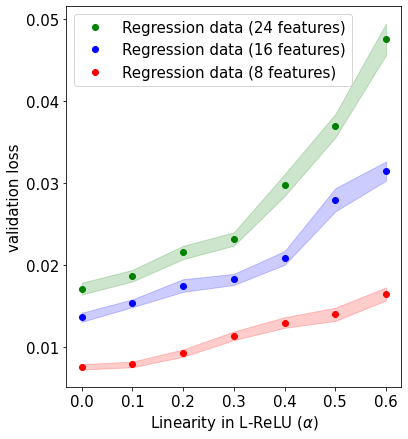

In [4]:
plt.rcParams["figure.figsize"] = (6,7)
plt.rcParams.update({'font.size': 15})
plt.plot(alphas, yreg_24, 'ko', label="Regression data (24 features)", color='g')
plt.fill_between(alphas, yreg_24-yreg_error_24, yreg_24+yreg_error_24, color='g', alpha=0.2)
plt.plot(alphas, yreg_16, 'ko', label="Regression data (16 features)", color='b')
plt.fill_between(alphas, yreg_16-yreg_error_16, yreg_16+yreg_error_16, color='b', alpha=0.2)
plt.plot(alphas, yreg_8, 'ko', label="Regression data (8 features)", color='r')
plt.fill_between(alphas, yreg_8-yreg_error_8, yreg_8+yreg_error_8, color='r', alpha=0.2)
plt.xlabel(r"Linearity in L-ReLU ($\alpha$)")
plt.ylabel("validation loss")
plt.legend();

### 2. Classification without Transfer Learning

In [5]:
data_path_d = "./../../Classification_Analysis/New_MNIST_ana/ResultsData/performance_digits_mnist_vs_alpha.npy"
data_path_f = "./../../Classification_Analysis/New_MNIST_ana/ResultsData/performance_fashion_mnist_vs_alpha.npy"

In [6]:
perf_array_d = np.load(data_path_d)
perf_array_f = np.load(data_path_f)

In [7]:
mean_max_tr_acc_d = np.nanmean(perf_array_d[:,:,0], axis=0)
std_max_tr_acc_d = np.nanstd(perf_array_d[:,:,0], axis=0)
mean_max_vl_acc_d = np.nanmean(perf_array_d[:,:,2], axis=0)
std_max_vl_acc_d = np.nanstd(perf_array_d[:,:,2], axis=0)

mean_max_tr_loss_d = np.nanmean(perf_array_d[:,:,1], axis=0)
std_max_tr_loss_d = np.nanstd(perf_array_d[:,:,1], axis=0)
mean_max_vl_loss_d = np.nanmean(perf_array_d[:,:,3], axis=0)
std_max_vl_loss_d = np.nanstd(perf_array_d[:,:,3], axis=0)

rN = np.sqrt(20)
y_ta_d, y_va_d, y_tl_d, y_vl_d =  mean_max_tr_acc_d, mean_max_vl_acc_d, mean_max_tr_loss_d, mean_max_vl_loss_d
y_ta_er_d, y_va_er_d, y_tl_er_d, y_vl_er_d =  std_max_tr_acc_d/rN, std_max_vl_acc_d/rN, std_max_tr_loss_d/rN, std_max_vl_loss_d/rN

In [8]:
mean_max_tr_acc_f = np.nanmean(perf_array_f[:,:,0], axis=0)
std_max_tr_acc_f = np.nanstd(perf_array_f[:,:,0], axis=0)
mean_max_vl_acc_f = np.nanmean(perf_array_f[:,:,2], axis=0)
std_max_vl_acc_f = np.nanstd(perf_array_f[:,:,2], axis=0)

mean_max_tr_loss_f = np.nanmean(perf_array_f[:,:,1], axis=0)
std_max_tr_loss_f = np.nanstd(perf_array_f[:,:,1], axis=0)
mean_max_vl_loss_f = np.nanmean(perf_array_f[:,:,3], axis=0)
std_max_vl_loss_f = np.nanstd(perf_array_f[:,:,3], axis=0)

rN = np.sqrt(20)
y_ta_f, y_va_f, y_tl_f, y_vl_f =  mean_max_tr_acc_f, mean_max_vl_acc_f, mean_max_tr_loss_f, mean_max_vl_loss_f
y_ta_er_f, y_va_er_f, y_tl_er_f, y_vl_er_f =  std_max_tr_acc_f/rN, std_max_vl_acc_f/rN, std_max_tr_loss_f/rN, std_max_vl_loss_f/rN

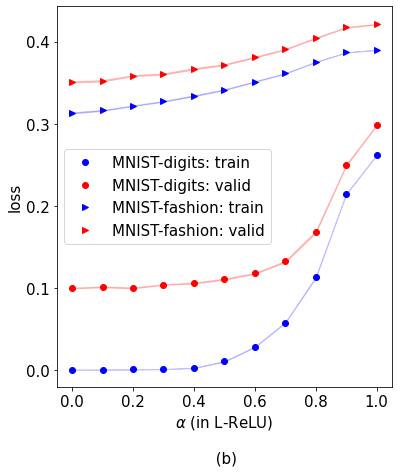

In [9]:
plt.rcParams["figure.figsize"] = (6,7)
plt.rcParams.update({'font.size': 15})
x = np.linspace(0., 1.0, num=11)

plt.plot(x, y_tl_d, 'ko', label="MNIST-digits: train", color='b')
plt.fill_between(x, y_tl_d-y_tl_er_d, y_tl_d+y_tl_er_d, color='b', alpha=0.2)
plt.plot(x, y_vl_d, 'ko', label="MNIST-digits: valid", color='r')
plt.fill_between(x, y_vl_d-y_vl_er_d, y_vl_d+y_vl_er_d, color='r', alpha=0.2)
plt.plot(x, y_tl_f, '>', label="MNIST-fashion: train", color='b')
plt.fill_between(x, y_tl_f-y_tl_er_f, y_tl_f+y_tl_er_f, color='b', alpha=0.2)
plt.plot(x, y_vl_f, '>', label="MNIST-fashion: valid", color='r')
plt.fill_between(x, y_vl_f-y_vl_er_f, y_vl_f+y_vl_er_f, color='r', alpha=0.2)
plt.xlabel(r"$\alpha$ (in L-ReLU)""\n\n (b)")
plt.ylabel("loss")
plt.legend(loc='center left');

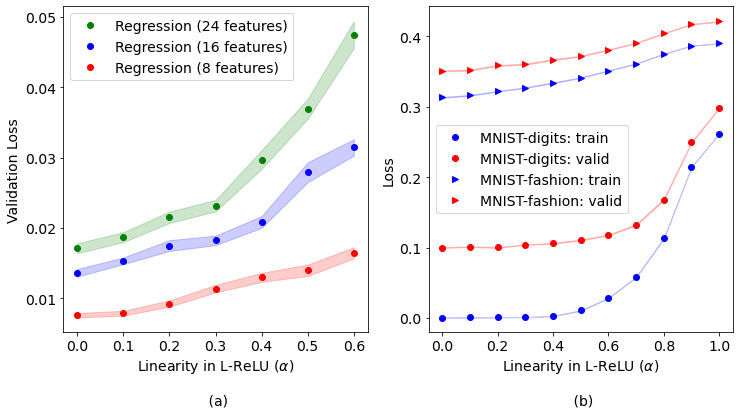

In [11]:
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["font.size"] = 14

gs1 = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs1[(0,0)])

ax.plot(alphas, yreg_24, 'ko', label="Regression (24 features)", color='g')
ax.fill_between(alphas, yreg_24-yreg_error_24, yreg_24+yreg_error_24, color='g', alpha=0.2)
ax.plot(alphas, yreg_16, 'ko', label="Regression (16 features)", color='b')
ax.fill_between(alphas, yreg_16-yreg_error_16, yreg_16+yreg_error_16, color='b', alpha=0.2)
ax.plot(alphas, yreg_8, 'ko', label="Regression (8 features)", color='r')
ax.fill_between(alphas, yreg_8-yreg_error_8, yreg_8+yreg_error_8, color='r', alpha=0.2)
ax.set_xlabel(r"Linearity in L-ReLU ($\alpha$)""\n\n (a)")
ax.set_ylabel("Validation Loss")
ax.legend();

ax = plt.subplot(gs1[(0,1)])

ax.plot(x, y_tl_d, 'ko', label="MNIST-digits: train", color='b')
ax.fill_between(x, y_tl_d-y_tl_er_d, y_tl_d+y_tl_er_d, color='b', alpha=0.2)
ax.plot(x, y_vl_d, 'ko', label="MNIST-digits: valid", color='r')
ax.fill_between(x, y_vl_d-y_vl_er_d, y_vl_d+y_vl_er_d, color='r', alpha=0.2)
ax.plot(x, y_tl_f, '>', label="MNIST-fashion: train", color='b')
ax.fill_between(x, y_tl_f-y_tl_er_f, y_tl_f+y_tl_er_f, color='b', alpha=0.2)
ax.plot(x, y_vl_f, '>', label="MNIST-fashion: valid", color='r')
ax.fill_between(x, y_vl_f-y_vl_er_f, y_vl_f+y_vl_er_f, color='r', alpha=0.2)
ax.set_xlabel(r"Linearity in L-ReLU ($\alpha$)""\n\n (b)")
ax.set_ylabel("Loss")
ax.legend(loc='center left');
plt.savefig("./../../PaperFigs/Reg_Class_vs_alpha.png")


### 3. Classification with Transfer Learning

In [20]:
Perf_array_DV = np.load("performance_DogVGG16_vs_alpha.npy")
Perf_array_DI = np.load("performance_DogInceptionV3_vs_alpha.npy")
Perf_array_DR = np.load("performance_DogResnet50_vs_alpha.npy")
Perf_array_CV = np.load("performance_cifar10_VGG16_5K_vs_alpha.npy")
Perf_array_DV2 = np.load("performance_DogVGG19_vs_alpha.npy")
Perf_array_DX = np.load("performance_DogXception_5K_vs_alpha.npy")

In [21]:
# FOOD-11 transfer learning (VGG16) results vs alpha
vl_FV = np.array([1.6009473303953807,
 1.6053545741420803,
 1.5812286289051325,
 1.5524671055150754,
 1.5418267409006754,
 1.5184319988645687,
 1.4998958143062922,
 1.485937825545217,
 1.4649078881098363,
 1.448090162692648,
 1.4331983400934654])

vl_std = np.array([0.0,
 0.004407243746699541,
 0.0343084780403856,
 0.058004132889270164,
 0.056075422265894605,
 0.07319116927559317,
 0.08156721098462119,
 0.08476636609595571,
 0.09962445589061066,
 0.10713567092346858,
 0.11248224978272826])

vl_FV_error = vl_std/np.sqrt(20)

In [22]:
mean_ar_DV = np.nanmean(Perf_array_DV, axis=0)
std_ar_DV = np.nanstd(Perf_array_DV, axis=0)

mean_ar_DX = np.nanmean(Perf_array_DX, axis=0)
std_ar_DX = np.nanstd(Perf_array_DX, axis=0)

mean_ar_DV2 = np.nanmean(Perf_array_DV2, axis=0)
std_ar_DV2 = np.nanstd(Perf_array_DV2, axis=0)

mean_ar_DI = np.nanmean(Perf_array_DI, axis=0)
std_ar_DI = np.nanstd(Perf_array_DI, axis=0)

mean_ar_DR = np.nanmean(Perf_array_DR, axis=0)
std_ar_DR = np.nanstd(Perf_array_DR, axis=0)

mean_ar_CV = np.nanmean(Perf_array_CV, axis=0)
std_ar_CV = np.nanstd(Perf_array_CV, axis=0)

In [23]:
vl_DV = mean_ar_DV[:,3]
vl_DV_error = std_ar_DV[:,3]/np.sqrt(20)

vl_DX = mean_ar_DX[:,3]
vl_DX_error = std_ar_DX[:,3]/np.sqrt(10)

vl_DV2 = mean_ar_DV2[:,3]
vl_DV2_error = std_ar_DV2[:,3]/np.sqrt(20)

vl_DI = mean_ar_DI[:,3]
vl_DI_error = std_ar_DI[:,3]/np.sqrt(20)

vl_DR = mean_ar_DR[:,3]
vl_DR_error = std_ar_DR[:,3]/np.sqrt(20)

vl_CV = mean_ar_CV[:,3]
vl_CV_error = std_ar_CV[:,3]/np.sqrt(20)

alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [24]:
vl_FV = vl_FV/vl_FV[0]
vl_FV_error = vl_FV_error/vl_FV[0]

vl_DV = vl_DV/vl_DV[0]
vl_DV_error = vl_DV_error/vl_DV[0]

vl_DX = vl_DX/vl_DX[0]
vl_DX_error = vl_DX_error/vl_DX[0]

vl_DV2 = vl_DV2/vl_DV2[0]
vl_DV2_error = vl_DV2_error/vl_DV2[0]

vl_CV = vl_CV/vl_CV[0]
vl_CV_error = vl_CV_error/vl_CV[0]

vl_DI = vl_DI/vl_DI[0]
vl_DI_error = vl_DI_error/vl_DI[0]

vl_DR = vl_DR/vl_DR[0]
vl_DR_error = vl_DR_error/vl_DR[0]

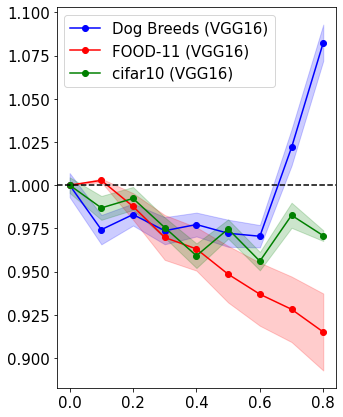

In [25]:
plt.rcParams["figure.figsize"] = (5,7)
plt.rcParams.update({'font.size': 15})
plt.plot(alphas[:9], vl_DV[:9], '-ko', label="Dog Breeds (VGG16)", color='b')
plt.fill_between(alphas[:9], vl_DV[:9]-vl_DV_error[:9], vl_DV[:9]+vl_DV_error[:9], color='b', alpha=0.2)
plt.plot(alphas[:9], vl_FV[:9], '-ko', label="FOOD-11 (VGG16)", color='r')
plt.fill_between(alphas[:9], vl_FV[:9]-vl_FV_error[:9], vl_FV[:9]+vl_FV_error[:9], color='r', alpha=0.2)
plt.plot(alphas[:9], vl_CV[:9], '-ko', label="cifar10 (VGG16)", color='g')
plt.fill_between(alphas[:9], vl_CV[:9]-vl_CV_error[:9], vl_CV[:9]+vl_CV_error[:9], color='g', alpha=0.2)
plt.axhline(y=1.0, color='black', linestyle='--')
plt.legend(loc="upper left");

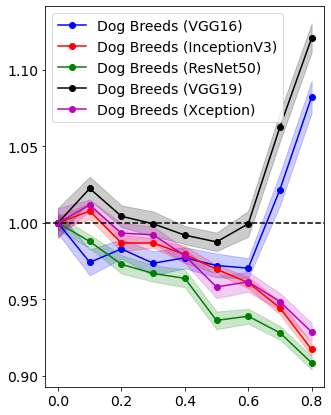

In [26]:
plt.rcParams["figure.figsize"] = (5,7)
plt.rcParams.update({'font.size': 14})
plt.plot(alphas[:9], vl_DV[:9], '-ko', label="Dog Breeds (VGG16)", color='b')
plt.fill_between(alphas[:9], vl_DV[:9]-vl_DV_error[:9], vl_DV[:9]+vl_DV_error[:9], color='b', alpha=0.2)
plt.plot(alphas[:9], vl_DI[:9], '-ko', label="Dog Breeds (InceptionV3)", color='r')
plt.fill_between(alphas[:9], vl_DI[:9]-vl_DI_error[:9], vl_DI[:9]+vl_DI_error[:9], color='r', alpha=0.2)
plt.plot(alphas[:9], vl_DR[:9], '-ko', label="Dog Breeds (ResNet50)", color='g')
plt.fill_between(alphas[:9], vl_DR[:9]-vl_DR_error[:9], vl_DR[:9]+vl_DR_error[:9], color='g', alpha=0.2)
plt.plot(alphas[:9], vl_DV2[:9], '-ko', label="Dog Breeds (VGG19)", color='k')
plt.fill_between(alphas[:9], vl_DV2[:9]-vl_DV2_error[:9], vl_DV2[:9]+vl_DV2_error[:9], color='k', alpha=0.2)
plt.plot(alphas[:9], vl_DX[:9], '-ko', label="Dog Breeds (Xception)", color='m')
plt.fill_between(alphas[:9], vl_DX[:9]-vl_DX_error[:9], vl_DX[:9]+vl_DX_error[:9], color='m', alpha=0.2)
plt.axhline(y=1.0, color='black', linestyle='--')
plt.legend(loc="upper left");

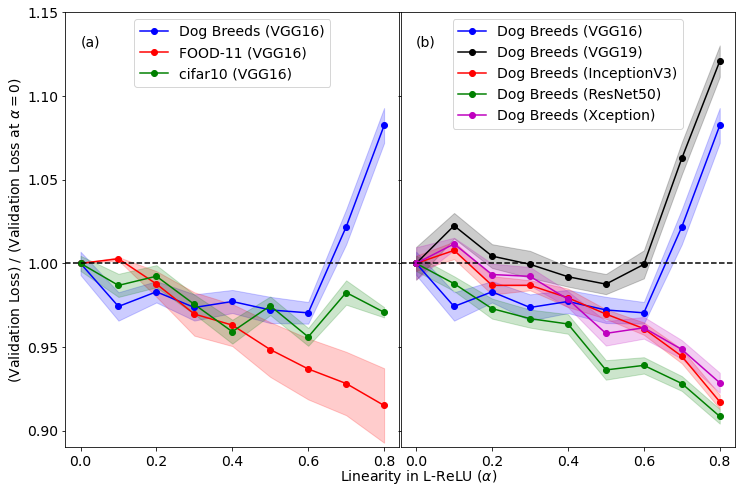

In [27]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 14

gs2 = gridspec.GridSpec(1, 2)
gs2.update(wspace=0.005, hspace=0.01)

ax = plt.subplot(gs2[(0,0)])
ax.set_ylim([0.89, 1.15])

ax.plot(alphas[:9], vl_DV[:9], '-ko', label="Dog Breeds (VGG16)", color='b')
ax.fill_between(alphas[:9], vl_DV[:9]-vl_DV_error[:9], vl_DV[:9]+vl_DV_error[:9], color='b', alpha=0.2)
ax.plot(alphas[:9], vl_FV[:9], '-ko', label="FOOD-11 (VGG16)", color='r')
ax.fill_between(alphas[:9], vl_FV[:9]-vl_FV_error[:9], vl_FV[:9]+vl_FV_error[:9], color='r', alpha=0.2)
ax.plot(alphas[:9], vl_CV[:9], '-ko', label="cifar10 (VGG16)", color='g')
ax.fill_between(alphas[:9], vl_CV[:9]-vl_CV_error[:9], vl_CV[:9]+vl_CV_error[:9], color='g', alpha=0.2)
ax.axhline(y=1.0, color='black', linestyle='--')
ax.set_ylabel(r"(Validation Loss) / (Validation Loss at $\alpha=0$)")
ax.text(0.0, 1.13, "(a)")
ax.legend(loc="upper center");

ax = plt.subplot(gs2[(0,1)])
ax.set_ylim([0.89, 1.15])

ax.plot(alphas[:9], vl_DV[:9], '-ko', label="Dog Breeds (VGG16)", color='b')
ax.fill_between(alphas[:9], vl_DV[:9]-vl_DV_error[:9], vl_DV[:9]+vl_DV_error[:9], color='b', alpha=0.2)
plt.plot(alphas[:9], vl_DV2[:9], '-ko', label="Dog Breeds (VGG19)", color='k')
plt.fill_between(alphas[:9], vl_DV2[:9]-vl_DV2_error[:9], vl_DV2[:9]+vl_DV2_error[:9], color='k', alpha=0.2)
ax.plot(alphas[:9], vl_DI[:9], '-ko', label="Dog Breeds (InceptionV3)", color='r')
ax.fill_between(alphas[:9], vl_DI[:9]-vl_DI_error[:9], vl_DI[:9]+vl_DI_error[:9], color='r', alpha=0.2)
ax.plot(alphas[:9], vl_DR[:9], '-ko', label="Dog Breeds (ResNet50)", color='g')
ax.fill_between(alphas[:9], vl_DR[:9]-vl_DR_error[:9], vl_DR[:9]+vl_DR_error[:9], color='g', alpha=0.2)
plt.plot(alphas[:9], vl_DX[:9], '-ko', label="Dog Breeds (Xception)", color='m')
plt.fill_between(alphas[:9], vl_DX[:9]-vl_DX_error[:9], vl_DX[:9]+vl_DX_error[:9], color='m', alpha=0.2)
ax.axhline(y=1.0, color='black', linestyle='--')
ax.text(-0.2, 0.87, r"Linearity in L-ReLU ($\alpha$)")
ax.text(0.0, 1.13, "(b)")
ax.set_yticklabels([])
ax.legend(loc="upper center");
plt.savefig("./../../PaperFigs/TL_vs_alpha.png")